In [29]:
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import datetime
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
sample_df = pd.read_csv('sample_cluster_metrics_2.csv')

In [53]:
sample_df.tail()

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second,api_server_requests
10076,2022-05-31 20:26:30,6.836476,7.348714e+10,9.932936e+10,73.983305,2022,5,31,20,26,30,19.0
10077,2022-05-31 20:27:30,6.694857,7.341065e+10,9.932936e+10,73.906291,2022,5,31,20,27,30,18.0
10078,2022-05-31 20:28:30,6.811524,7.365159e+10,9.932936e+10,74.148857,2022,5,31,20,28,30,19.0
10079,2022-05-31 20:29:30,6.984476,7.377087e+10,9.932936e+10,74.268946,2022,5,31,20,29,30,20.0
10080,2022-05-31 20:30:30,7.180857,7.433705e+10,9.932936e+10,74.838955,2022,5,31,20,30,30,20.0


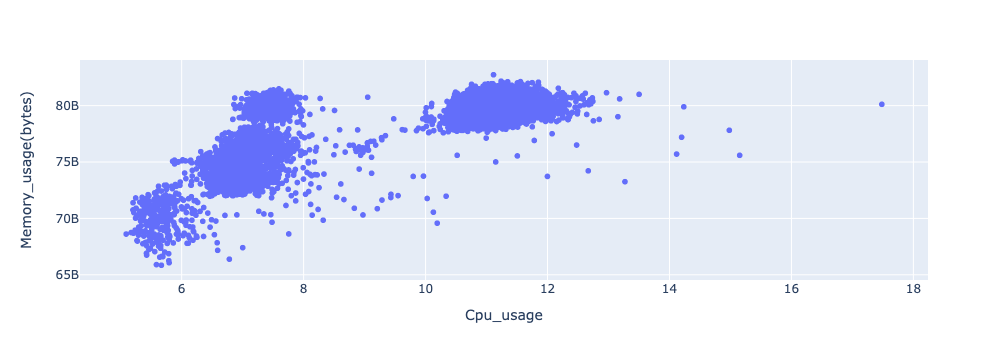

In [9]:
fig = px.scatter(sample_df, x="Cpu_usage", y="Memory_usage(bytes)")
fig.show()

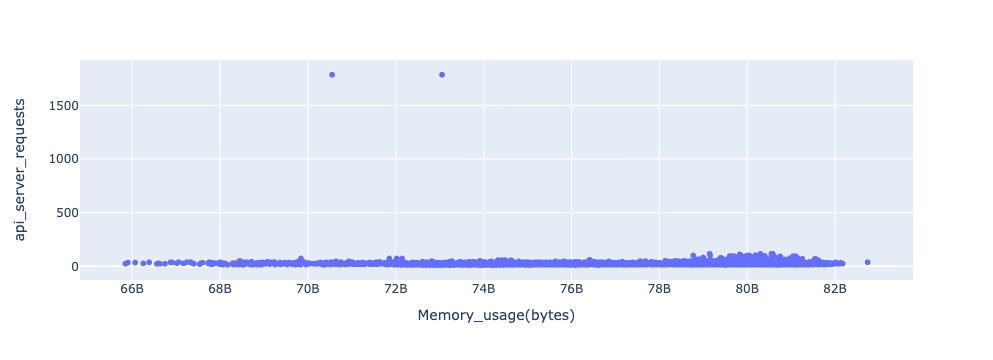

In [23]:
fig2 = px.scatter(sample_df, x="Memory_usage(bytes)", y="api_server_requests")
fig2.show()

In [ ]:
fig3 = px.scatter(sample_df, x="Cpu_usage", y="api_server_requests")
fig3.show()

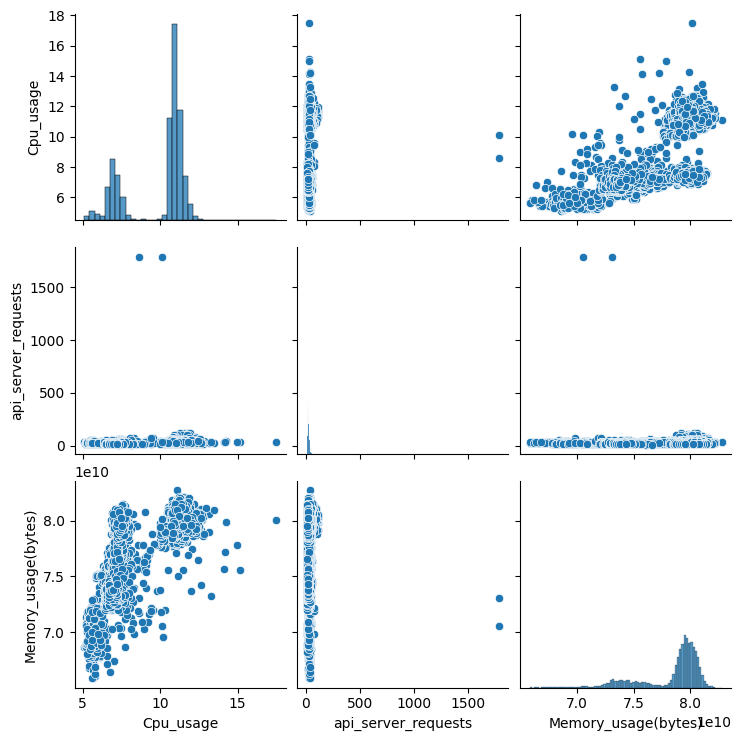

In [40]:
sns.pairplot(sample_df[["timestamp","Cpu_usage","api_server_requests","Memory_usage(bytes)"]])

In [33]:
sample_df[["timestamp","Cpu_usage","api_server_requests","Memory_usage(bytes)"]].head()

,timestamp,Cpu_usage,api_server_requests,Memory_usage(bytes)
0,2022-05-24 20:30:30,11.048095,20.0,7.939569e+10
1,2022-05-24 20:31:30,11.307619,20.0,7.941103e+10
2,2022-05-24 20:32:30,10.950190,24.0,7.931800e+10
3,2022-05-24 20:33:30,10.637905,24.0,7.887014e+10
4,2022-05-24 20:34:30,10.954381,21.0,7.842979e+10


In [10]:
covariance = np.cov(sample_df["Cpu_usage"],sample_df["Memory_usage(bytes)"])

In [11]:
covariance

array([[3.67455291e+00, 4.42927137e+09],
       [4.42927137e+09, 7.62200414e+18]])

In [17]:
from scipy.stats import pearsonr,spearmanr

Linear Relation between Cpu Usage and Memory Usage(Bytes)

In [27]:
pearson_coeff,_ = pearsonr(sample_df["Cpu_usage"],sample_df["Memory_usage(bytes)"])
pearson_coeff

0.836942161656312

Non Linear Relation between Cpu_usage and Memory_usage, Since there is a linear relation between these two variables we can see the Spearman Coefficient being low.

In [20]:
spearmans_coeff = spearmanr(sample_df["Cpu_usage"],sample_df["Memory_usage(bytes)"])
spearmans_coeff

SpearmanrResult(correlation=0.6124787991026875, pvalue=0.0)

Pearson Coefficient between Cpu Usage and api server requests

In [24]:
pearson_coeff,_ = pearsonr(sample_df["Cpu_usage"],sample_df["api_server_requests"])
pearson_coeff

0.14081336607517903

In [28]:
pearson_coeff,_ = pearsonr(sample_df["Memory_usage(bytes)"],sample_df["api_server_requests"])
pearson_coeff

-0.0035367914606455313

In [38]:
from sklearn.preprocessing import StandardScaler

In [52]:
scalar = StandardScaler()
scalar.fit(sample_df["Memory_usage(bytes)"].values.reshape(-1,1))
normalized_mem = scalar.transform(sample_df["Memory_usage(bytes)"].values.reshape(-1,1))
print(normalized_mem.shape)

(10081, 1)


In [54]:
sample_df["Memory_usage(bytes)"] = normalized_mem

In [57]:
sample_df.head()

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second,api_server_requests
0,2022-05-24 20:30:30,11.048095,0.374519,9.932936e+10,79.931747,2022,5,24,20,30,30,20.0
1,2022-05-24 20:31:30,11.307619,0.380076,9.932936e+10,79.947190,2022,5,24,20,31,30,20.0
2,2022-05-24 20:32:30,10.950190,0.346378,9.932936e+10,79.853534,2022,5,24,20,32,30,24.0
3,2022-05-24 20:33:30,10.637905,0.184147,9.932936e+10,79.402645,2022,5,24,20,33,30,24.0
4,2022-05-24 20:34:30,10.954381,0.024637,9.932936e+10,78.959319,2022,5,24,20,34,30,21.0
